In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/linearregression/main/1995_96%20-%202020%20Premier%20league%20standings.csv')
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996


In [8]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020,-13
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020,-26
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020,-25
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020,-28


In [7]:
df['GD'] = df['GF'] - df['GA']   

In [21]:
# Setting up x & y variables

X = df['GD'].values.reshape(-1,1)
Y = df.iloc[:,0]   

In [22]:
# split data for train and test

X_train, X_test,y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 1)
(350,)
(150, 1)
(150,)


In [24]:
# fit split data into the LR algorithm

LR = LinearRegression()
model = LR.fit(X_train,y_train)

In [26]:
model.intercept_

10.607018378411594

In [28]:
model.coef_

array([-0.2167219])

In [31]:
# predict 

y_predict = model.predict(X_test)
y_predict[0:5]

array([ 6.48930219, 12.34079362,  5.83913648,  7.78963362, 11.25718409])

In [49]:
y_predict = model.predict(X_test)
y_predict[0:5]

array([ 6.48930219, 12.34079362,  5.83913648,  7.78963362, 11.25718409])

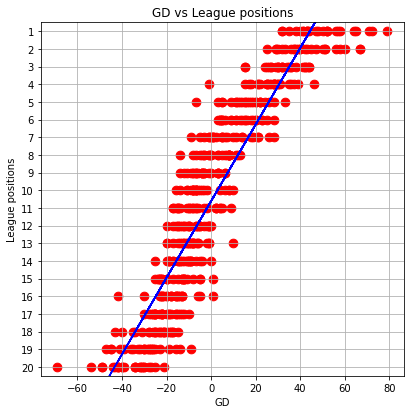

In [50]:
#Plotting
%matplotlib inline

fig, ax = plt.subplots(figsize=(6.5,6.5))
plt.scatter(X,Y,color = 'r',marker = 'o',s = 75)
plt.plot(X_test,y_predict, c  = 'blue',)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylim(0.5,20.5)
plt.gca().invert_yaxis()
plt.title('GD vs League positions')
plt.xlabel('GD')
plt.ylabel('League positions')
plt.grid()

In [52]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predict)
print(MSE)

5.640306729329638


In [55]:
r_sq = model.score(X_test,y_test)
r_sq

0.8043902650376757

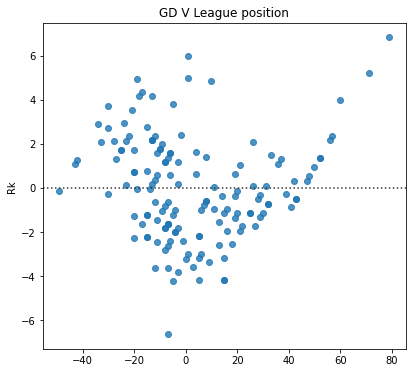

In [64]:
import seaborn as sns
width = 6.5
height = 6

plt.subplots(figsize=(width,height))
sns.residplot(X_test,y_test)
plt.title('GD V League position')
plt.show()